<h1 style="font-size:80px; text-align: center; margin-bottom: 10px">Visualisation Demo</h1>
<p style="text-align:center">This Jupyter notebook explains how to use the various functions in the visualisation module of the package.</p>

In [1]:
import numpy as np

import legwork.source as source
import legwork.visualisation as vis

import astropy.units as u
import astropy.constants as const

import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

%config InlineBackend.figure_format = 'retina'

The visualisation module is designed to make it quick and easy to plot various distributions of a collection of gravitational wave sources as well as show them on the LISA sensitivity curve. To start, we can explore how we can use the module to investigate distributions of parameters.

# Plotting parameter distributions

## 1D distributions

The first function is `plot_1D_dist` which is essentially a wrapper over `matplotlib.hist`, `seaborn.kdeplot` and `seaborn.ecdf` such that you can dynamically switch between these types of distributions with the same function call. At its most basic level, you can use the function to examine a histogram of some distribution.

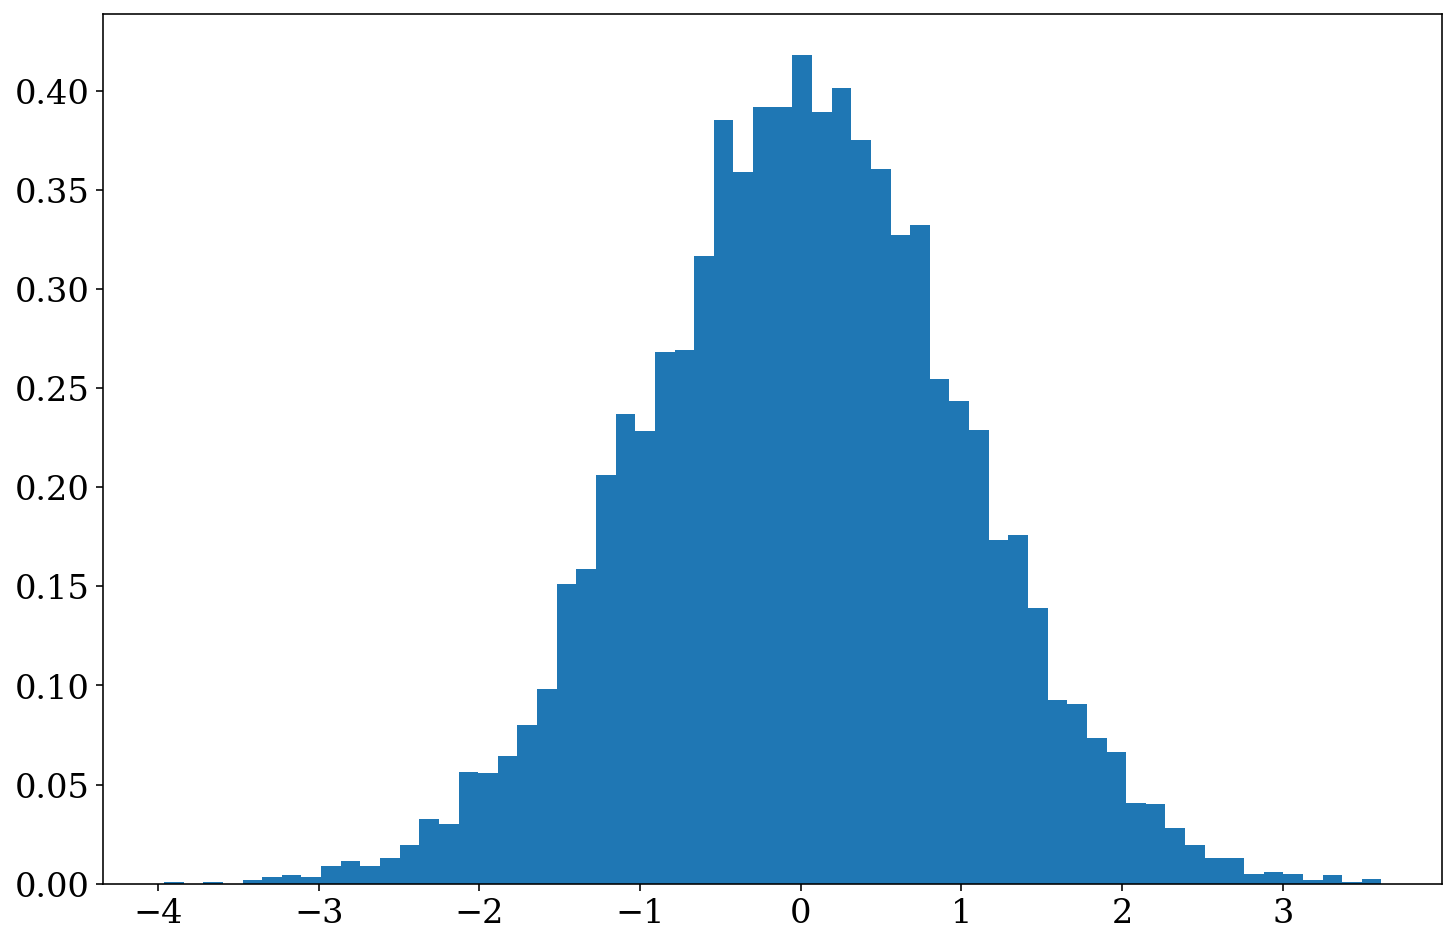

In [2]:
x = np.random.normal(size=10000)
fig, ax = vis.plot_1D_dist(x)

But this isn't very pretty, we can also specify various plot parameters as part of the function. Let's add some axis labels and change the x limits

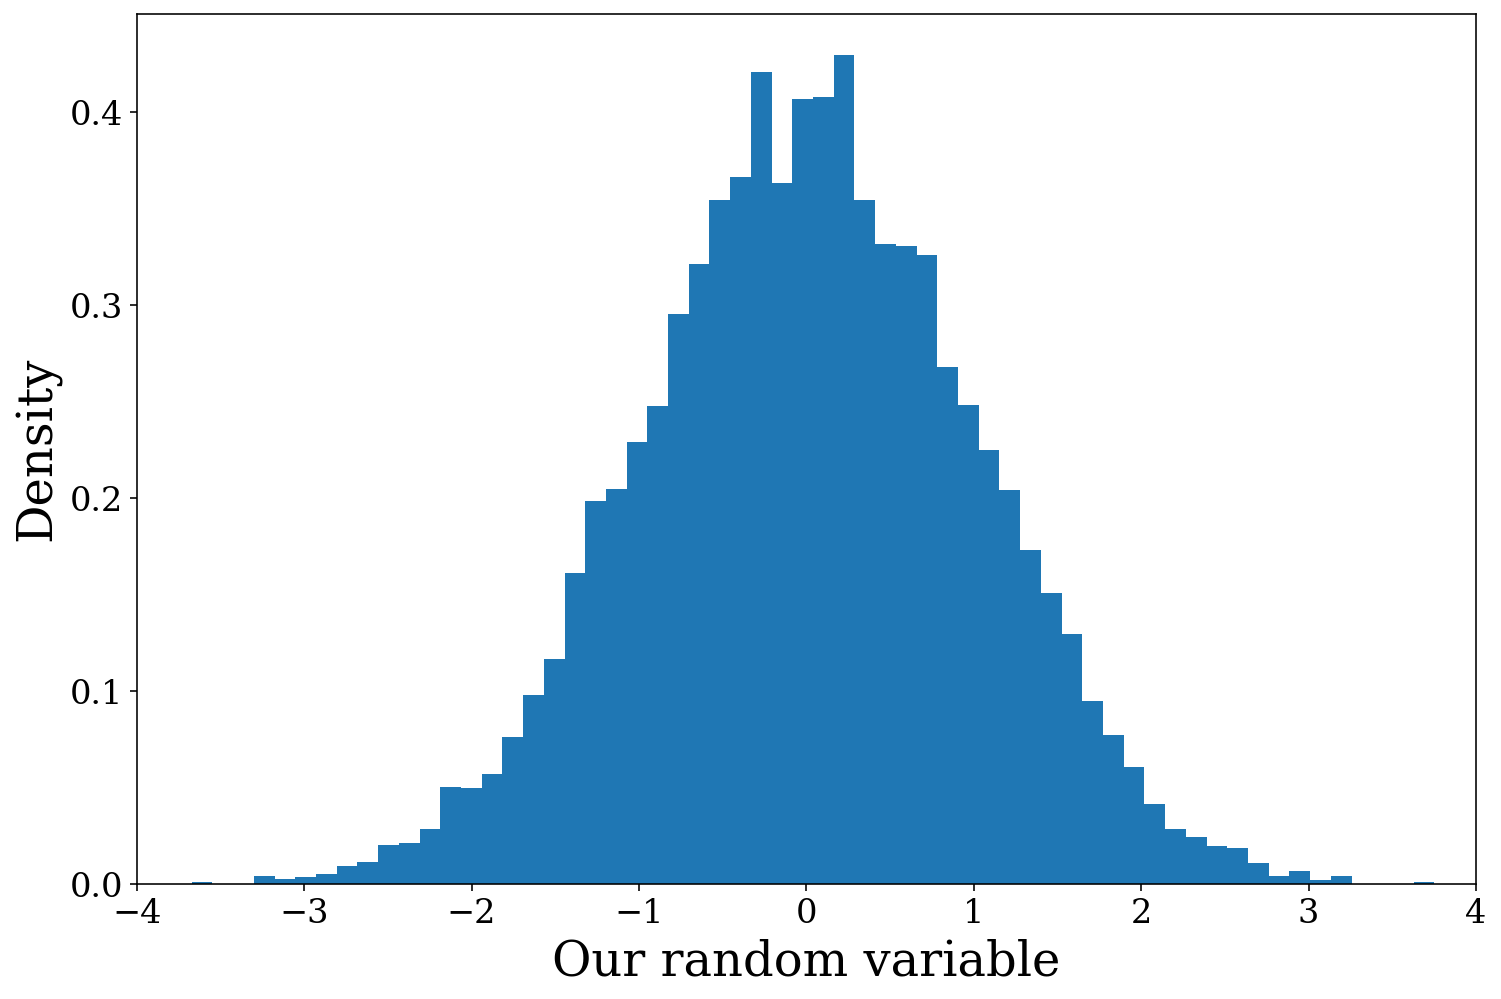

In [3]:
x = np.random.normal(size=10000)
fig, ax = vis.plot_1D_dist(x, xlabel="Our random variable", ylabel="Density", xlim=(-4, 4))

Nice! Perhaps instead of immediately showing the plot, it could be good to add some other features first. We can do this by specifying `show=False` and then using the returned figure and axis.

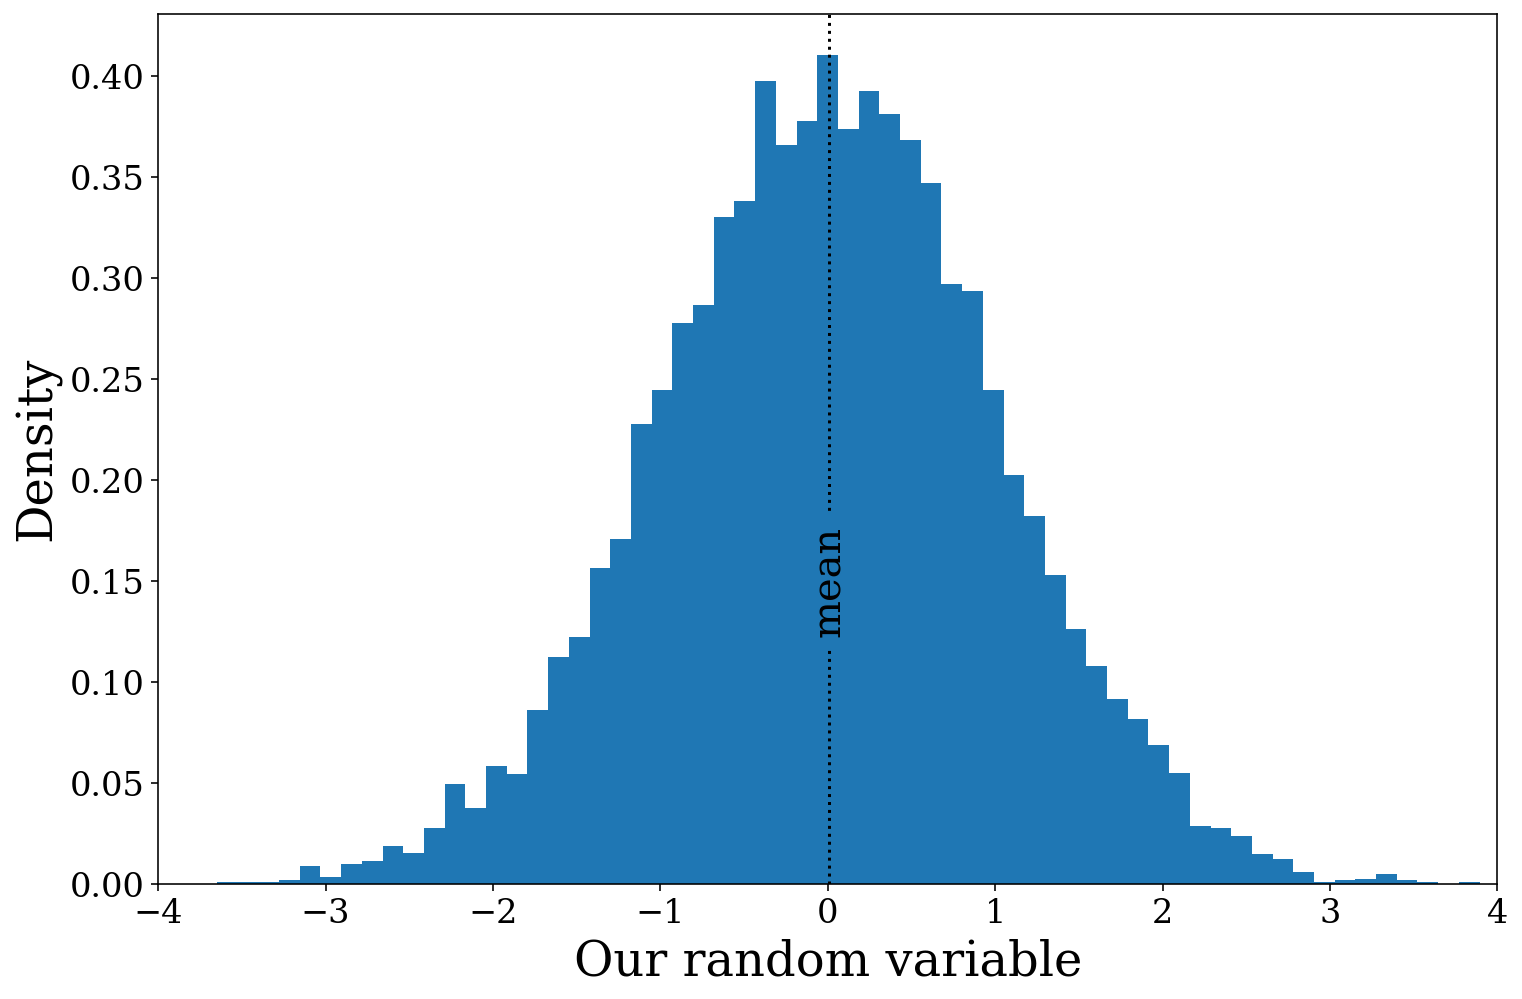

In [4]:
# create the histogram but don't show it
x = np.random.normal(size=10000)
fig, ax = vis.plot_1D_dist(x, xlabel="Our random variable", ylabel="Density", xlim=(-4, 4), show=False)

# add a line and annotation
ax.axvline(np.mean(x), linestyle="dotted", color="black")
ax.annotate(r"mean", xy=(np.mean(x), 0.15), rotation=90, ha="center", va="center",
            bbox=dict(boxstyle="round", fc="tab:blue", ec="none"), fontsize=20)

# show the figure
plt.show()

From here we can explore how we can change the distribution with various arguments. Let's add a KDE in addition to the histogram.

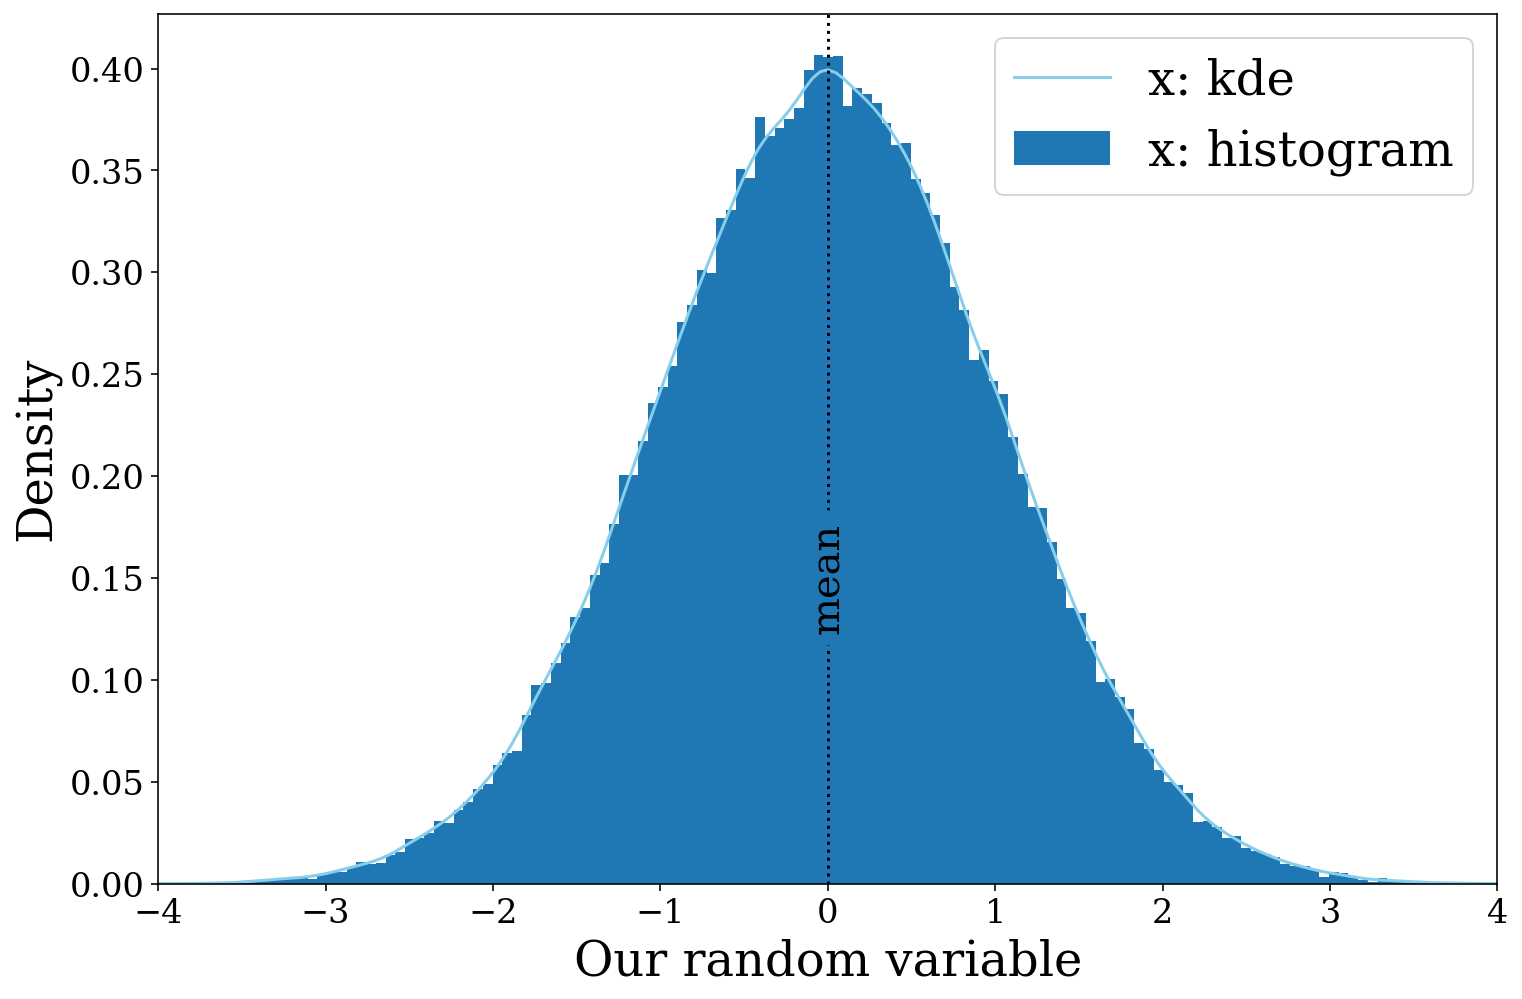

In [5]:
# create the histogram but don't show it
x = np.random.normal(size=100000)
fig, ax = vis.plot_1D_dist(x, disttype="kde", show=False, color="skyblue", label="x: kde")
fig, ax = vis.plot_1D_dist(x, xlabel="Our random variable", ylabel="Density", xlim=(-4, 4),
                           fig=fig, ax=ax, show=False, label="x: histogram")

# add a line and annotation
ax.axvline(np.mean(x), linestyle="dotted", color="black")
ax.annotate(r"mean", xy=(np.mean(x), 0.15), rotation=90, ha="center", va="center",
            bbox=dict(boxstyle="round", fc="tab:blue", ec="none"), fontsize=20)

ax.legend()

# show the figure
plt.show()

**More things you can try out**

- Explore the different disttypes, you can make an empirical cumulative distribution function with "ecdf".
- Try changing the number of bins in the histogram (`bins=10`) or adjusting the bandwidth for the kde (`bw_adjust=0.5`)
- Plot things on a log scale with (`log=True` or `log_scale=(True, False)`)

## 2D distributions

Very similar to the previous section except now you can make 2D distributions of either scatter plots or density distributions. Let's make a simple scatter plot first.

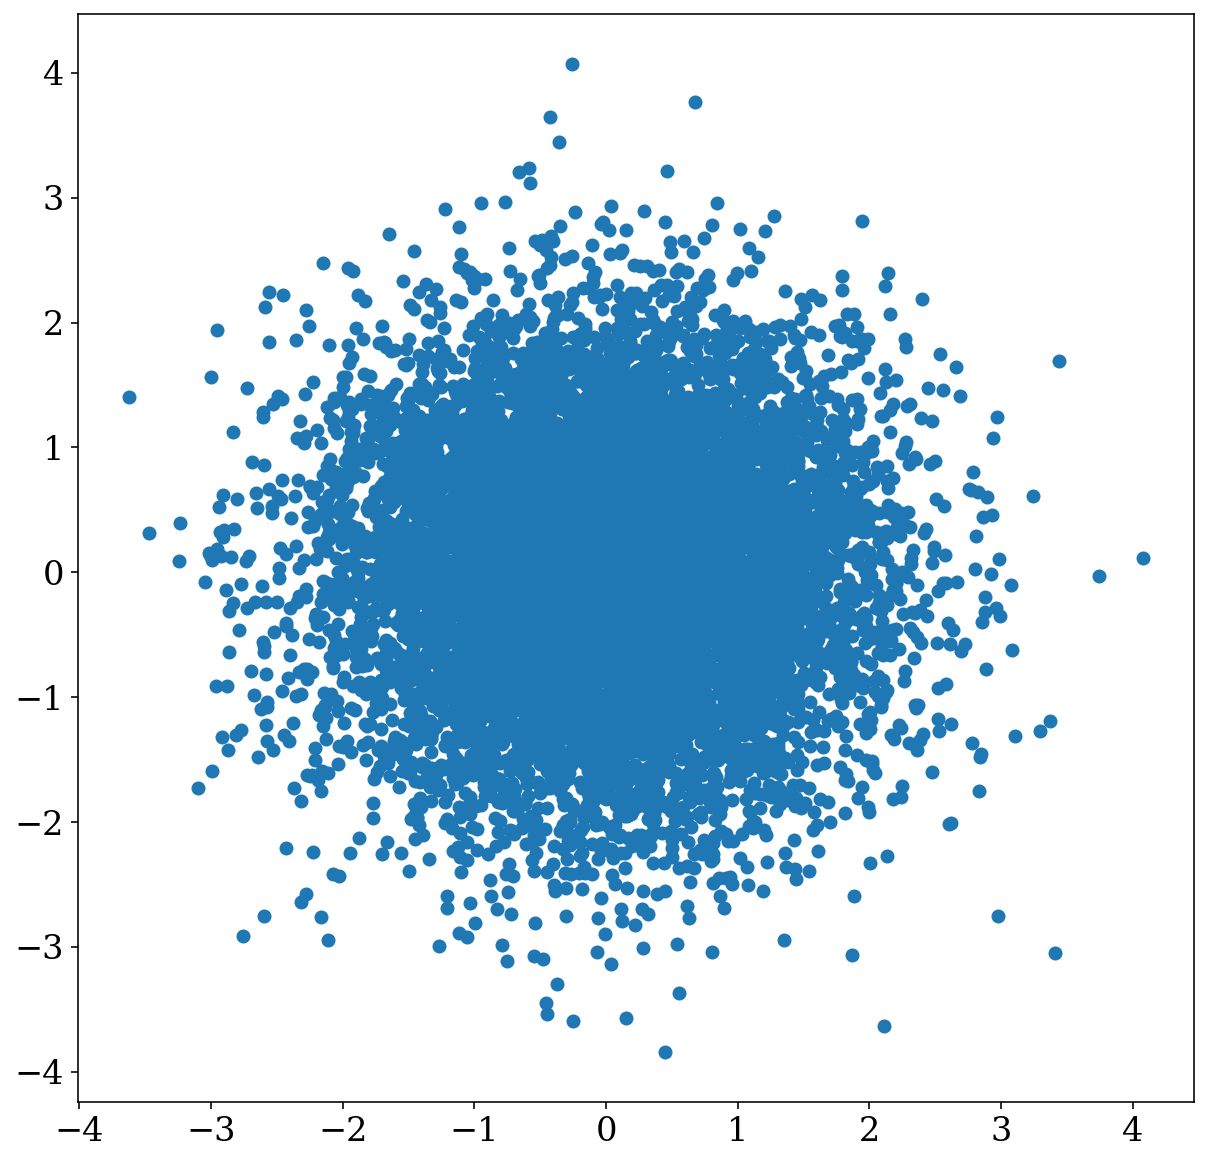

In [6]:
n_vals = 10000
x = np.random.normal(size=n_vals)
y = np.random.normal(size=n_vals)

# create a square figure
fig, ax = plt.subplots(figsize=(10, 10))

# add the scatter plot
fig, ax = vis.plot_2D_dist(x, y, fig=fig, ax=ax)

Again, we can make this much better by adding axis labels. But additionally the centre is rather oversaturated with points so it is hard to discern the distribution so let's try decreasing the point size

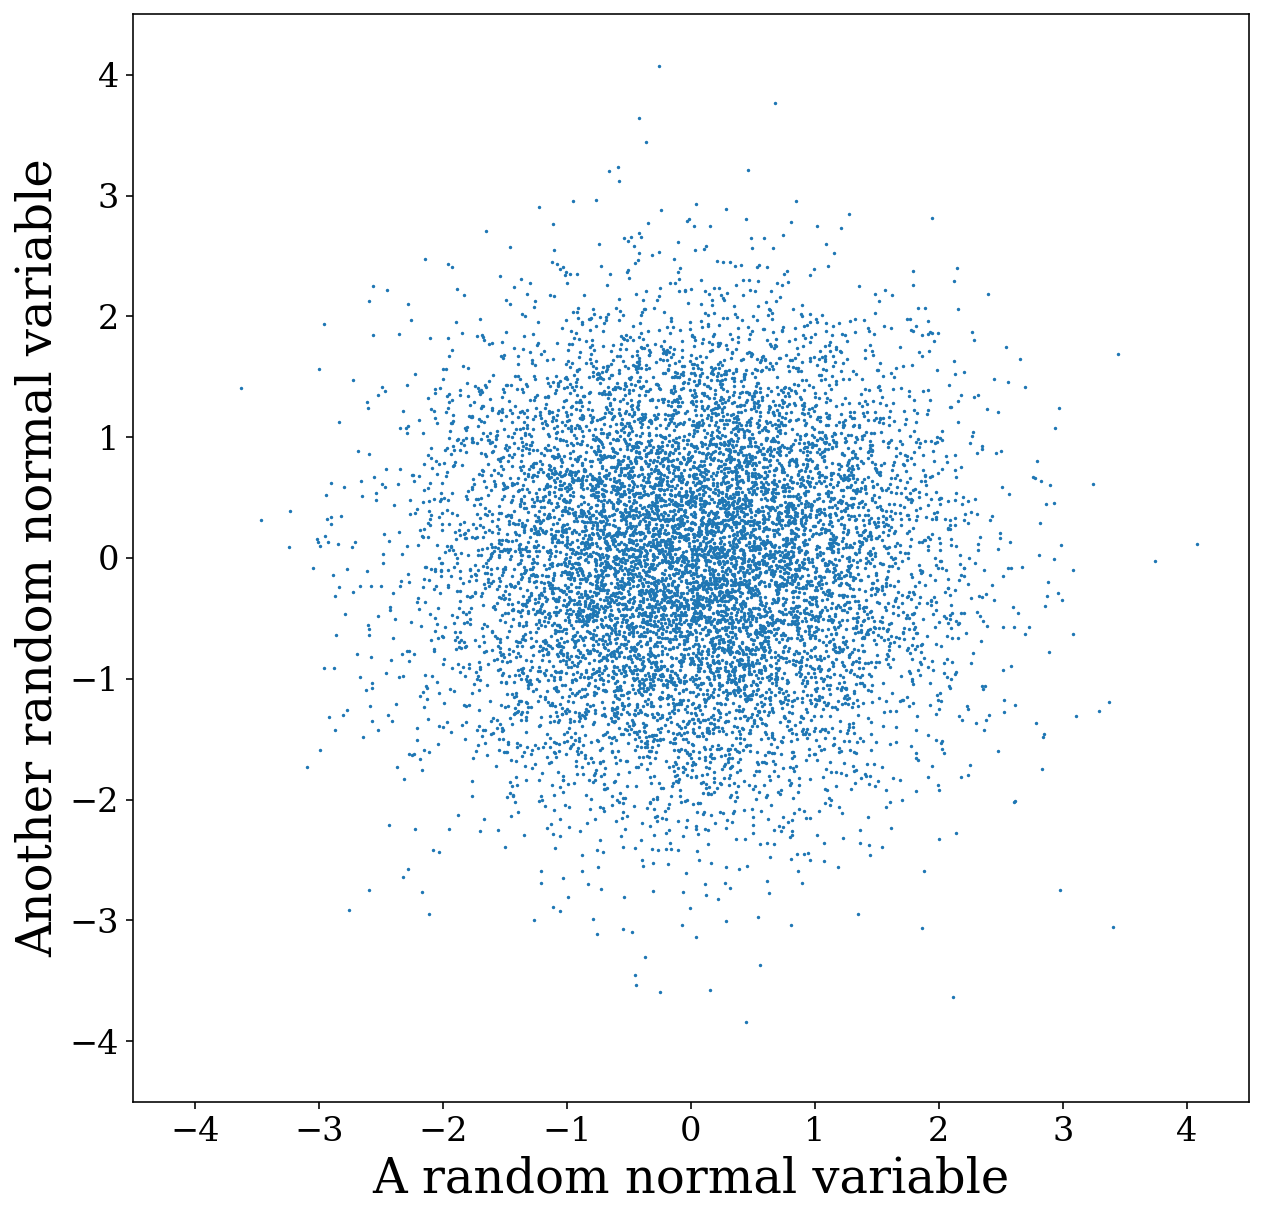

In [7]:
# create a square figure
fig, ax = plt.subplots(figsize=(10, 10))

# add the scatter plot
fig, ax = vis.plot_2D_dist(x, y, fig=fig, ax=ax, xlim=(-4.5, 4.5), ylim=(-4.5, 4.5),
                           xlabel="A random normal variable", ylabel="Another random normal variable", s=0.5)

Well perhaps the centre is better but now it is difficult to see the outliers. This is where the KDE density plot could really come in handy. So we can switch the `disttype` to kde.

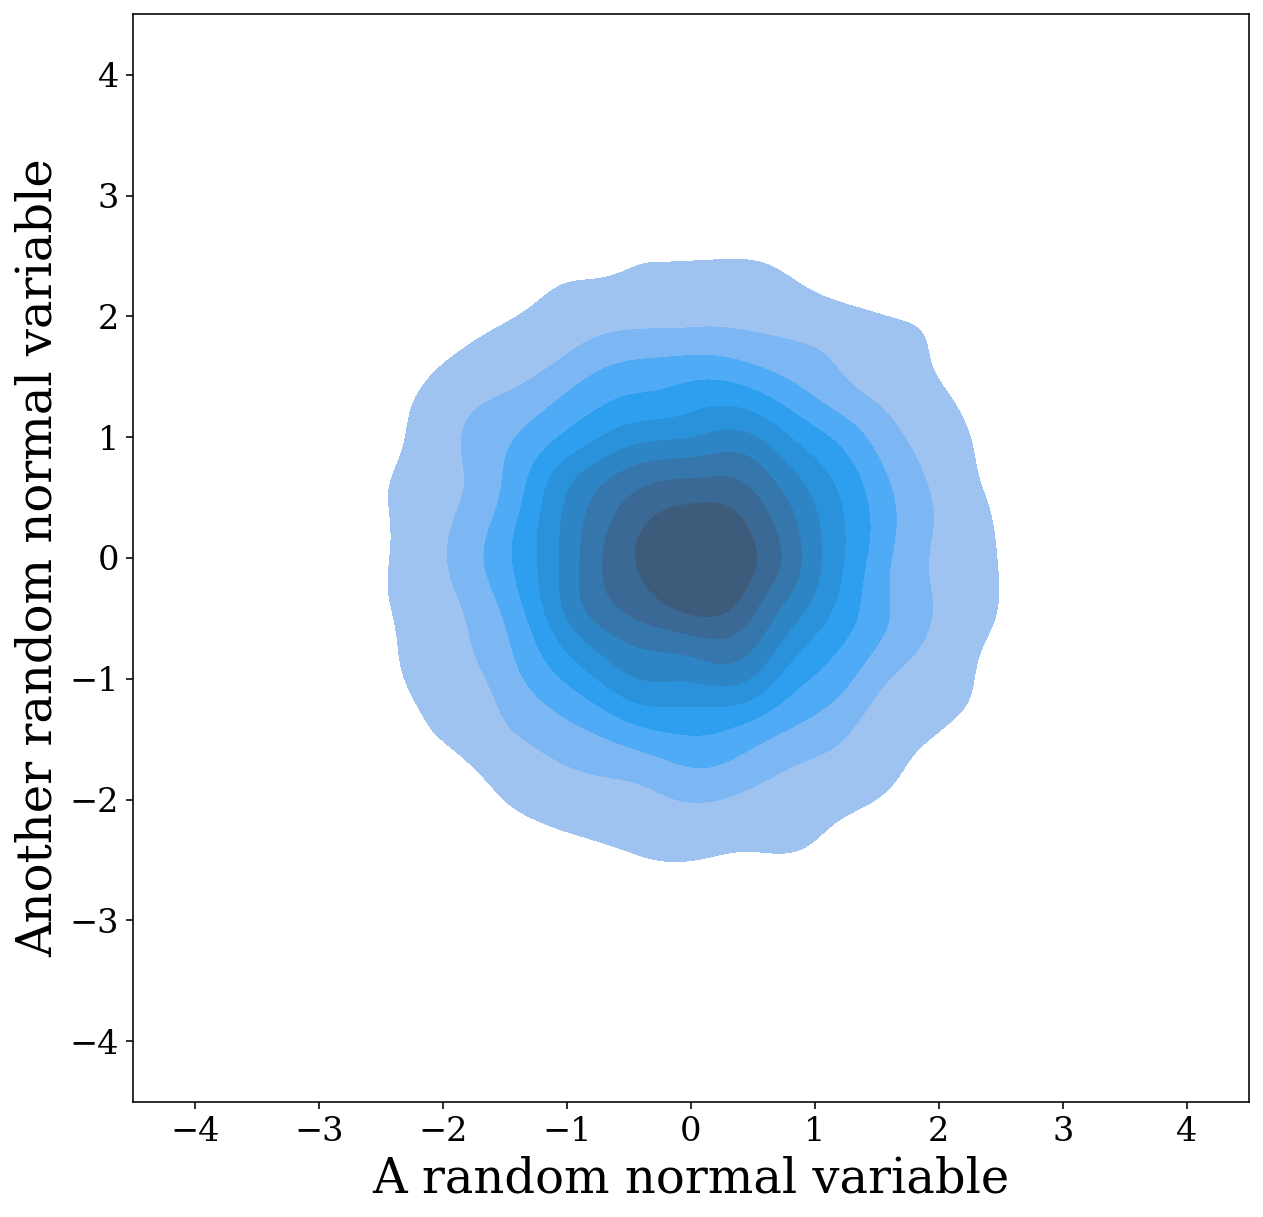

In [8]:
# create a square figure
fig, ax = plt.subplots(figsize=(10, 10))

# add the scatter plot
fig, ax = vis.plot_2D_dist(x, y, fig=fig, ax=ax, disttype="kde", fill=True, xlim=(-4.5, 4.5), ylim=(-4.5, 4.5),
                           xlabel="A random normal variable", ylabel="Another random normal variable")

That looks cool! But now we can't see any of the outliers as this density plot only goes down to the last 5% (you can adjust this with `thresh=0.01` for example). So why don't we also add the scatter plot so the outliers are still present.

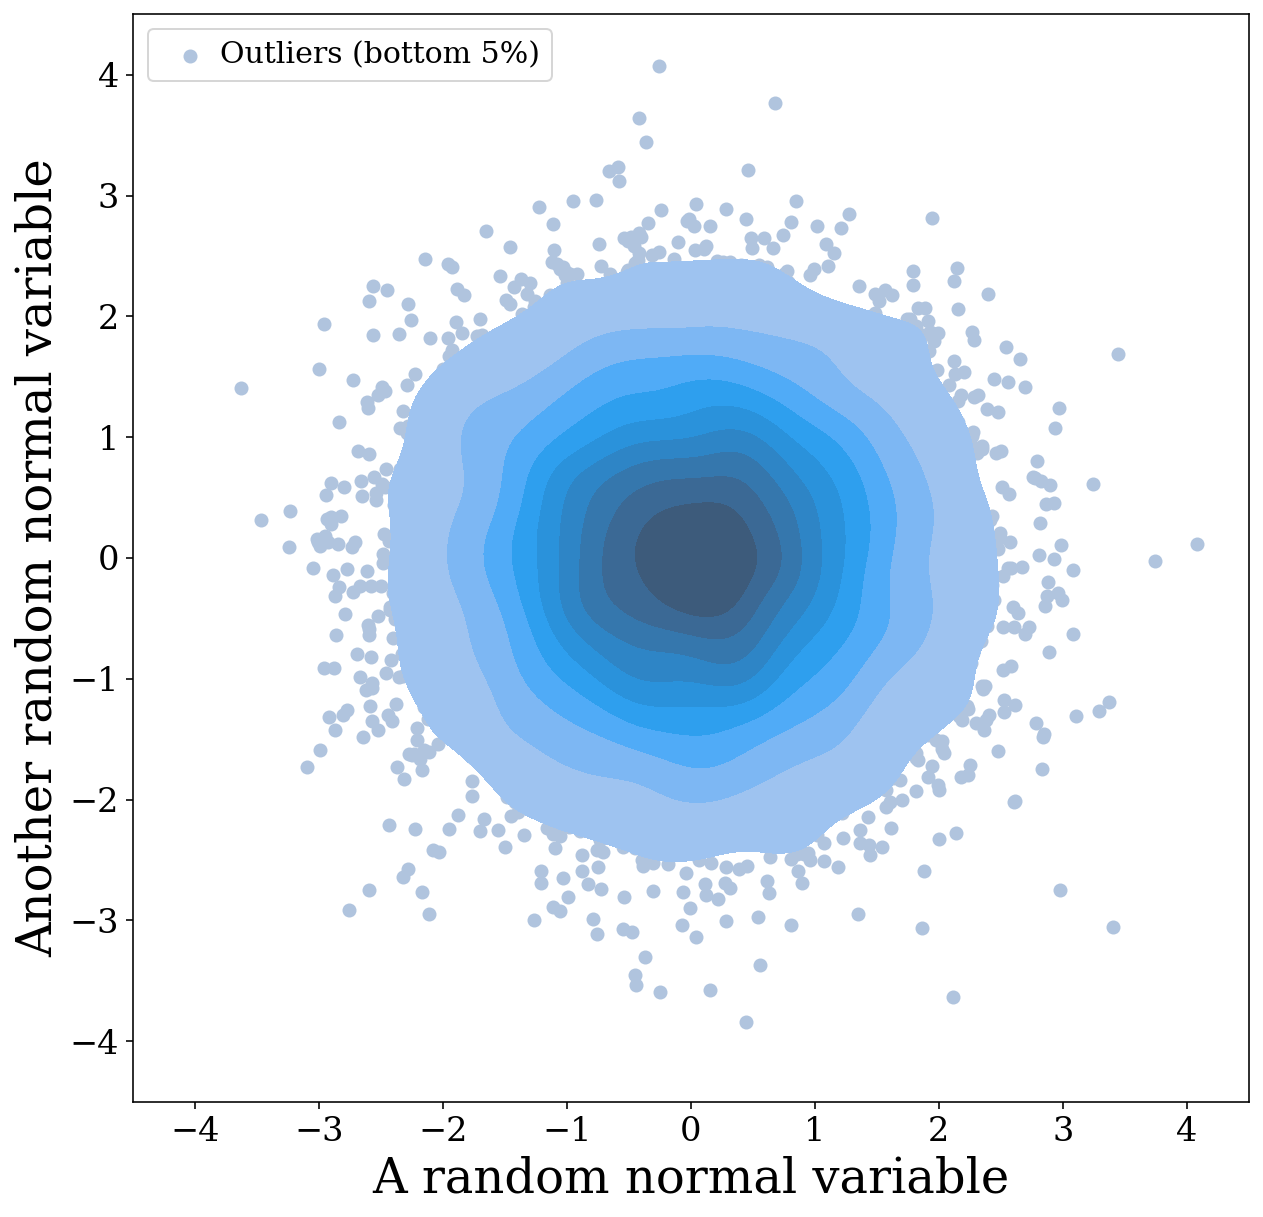

In [9]:
# create a square figure
fig, ax = plt.subplots(figsize=(10, 10))

# add the scatter plot
fig, ax = vis.plot_2D_dist(x, y, fig=fig, ax=ax, show=False, label="Outliers (bottom 5%)", color="lightsteelblue")
fig, ax = vis.plot_2D_dist(x, y, fig=fig, ax=ax, disttype="kde", fill=True, xlim=(-4.5, 4.5), ylim=(-4.5, 4.5), show=False,
                           xlabel="A random normal variable", ylabel="Another random normal variable")
ax.legend(loc="upper left", handletextpad=0.0, fontsize=15)
plt.show()

## Plotting distributions directly from the Source class

There is also a wrapper to help automatically plot and generate axis labels for plots of source parameters. For example, we can plot the chirp mass distribution

In [10]:
n_values = 1000
m_1 = np.random.uniform(0, 10, n_values) * u.Msun
m_2 = np.random.uniform(0, 10, n_values) * u.Msun
dist = np.random.uniform(0, 30, n_values) * u.kpc
f_orb = 10**(np.random.uniform(-5, -1, n_values)) * u.Hz
ecc = np.random.uniform(0.0, 0.2, n_values)
t_obs = 4 * u.yr

sources = source.Source(m_1, m_2, ecc, dist, f_orb=f_orb)

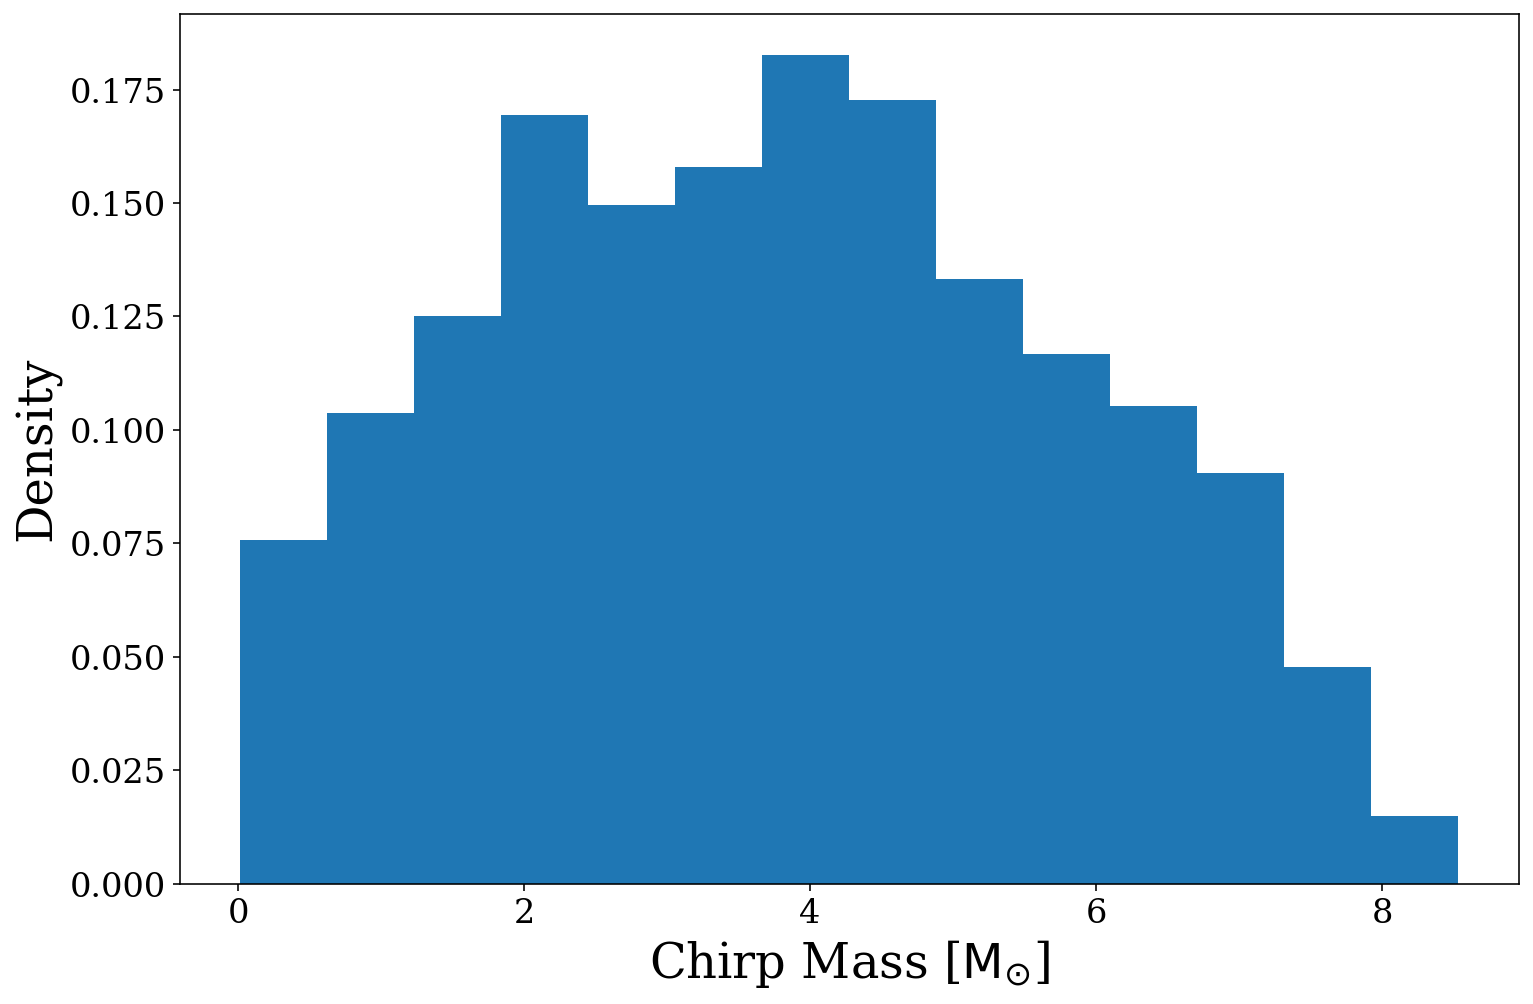

In [11]:
fig, ax = sources.plot_source_variables(xstr="m_c", ylabel="Density")

Also, note that the axis labels are auto-generated based on the units of the variable. For example, let's change the unit of the chirp mass to see how it changes the axis labels.

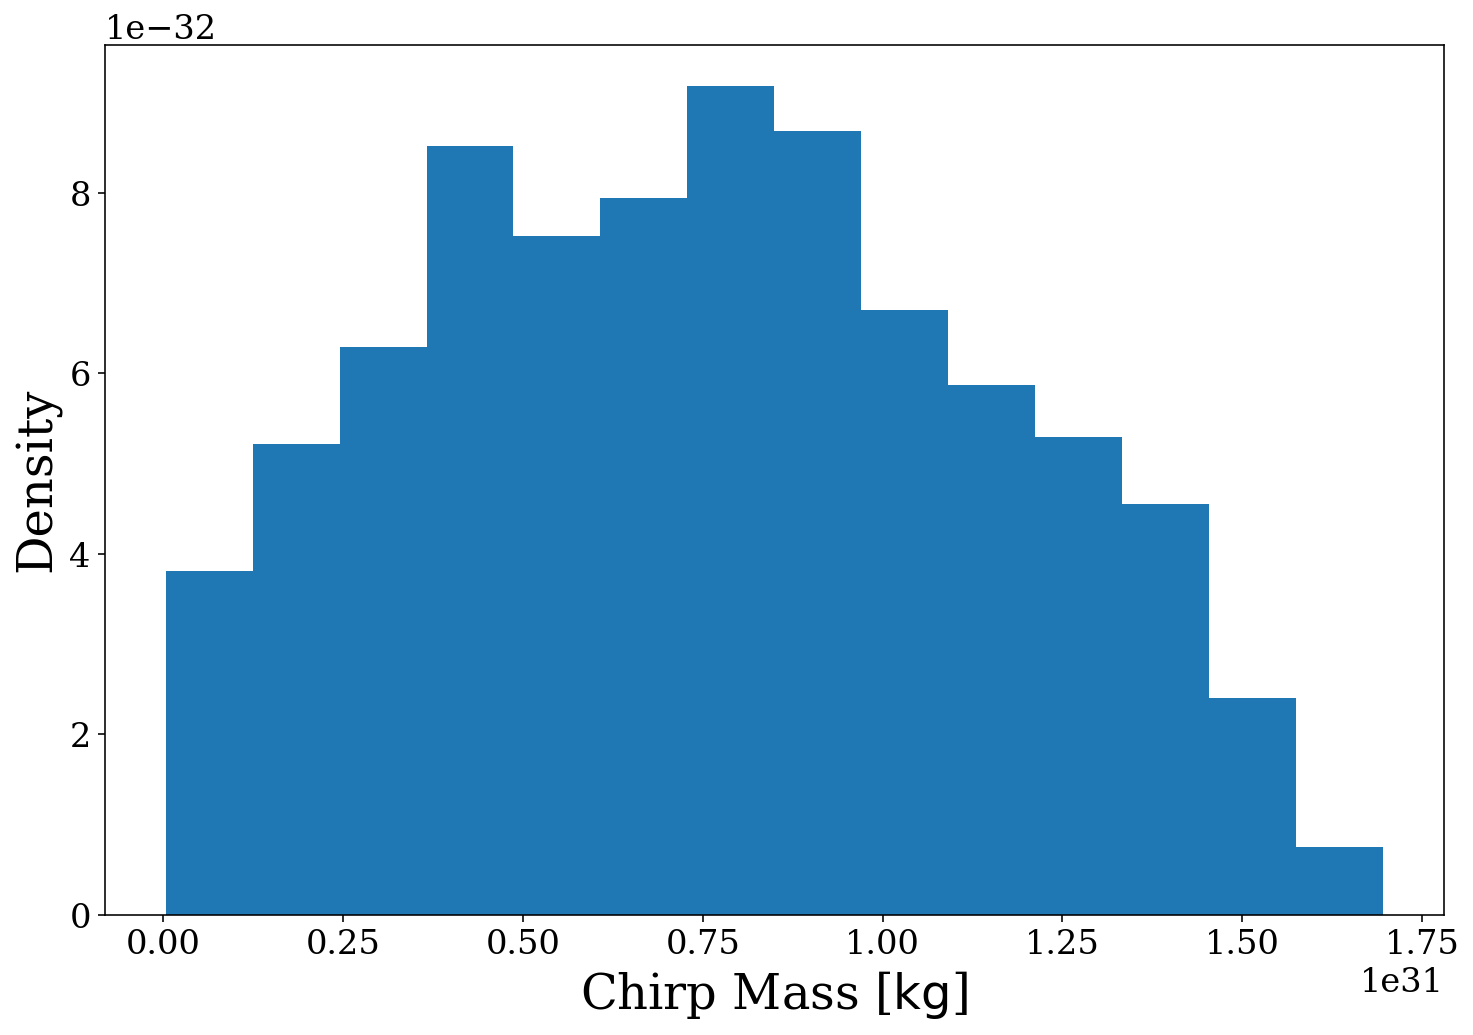

In [12]:
sources.m_c = sources.m_c.to(u.kg)
fig, ax = sources.plot_source_variables(xstr="m_c", ylabel="Density")

You can also supply two variables and get a 2D distribution instead. Let's compare the orbital frequency and signal-to-noise ratio (which we need to compute first)

In [13]:
snr = sources.get_snr(verbose=True)

Calculating SNR for 1000 sources
	714 sources are stationary
		236 sources are stationary and circular
		478 sources are stationary and eccentric
	286 sources are evolving
		74 sources are evolving and circular
		212 sources are evolving and eccentric


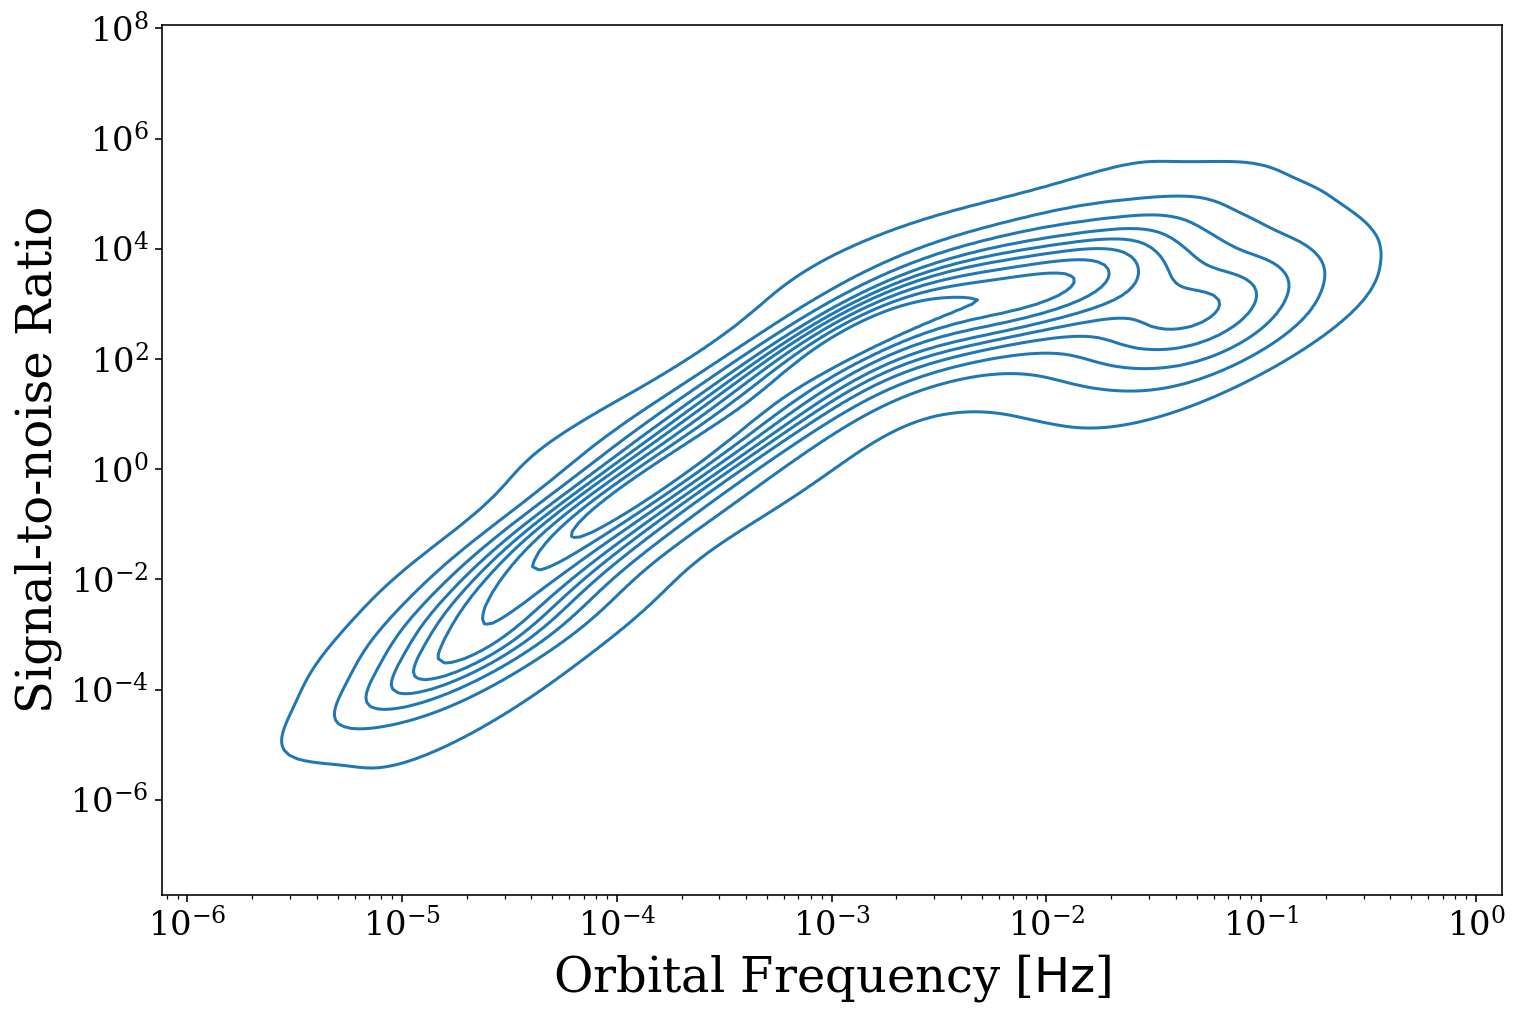

In [14]:
fig, ax = sources.plot_source_variables(xstr="f_orb", ystr="snr", disttype="kde", log_scale=(True, True))

# Plot LISA Sensitivity Curve

We also add functionality to plot the LISA sensitivity curve. Creating a basic sensitivity curve is as simple as this:

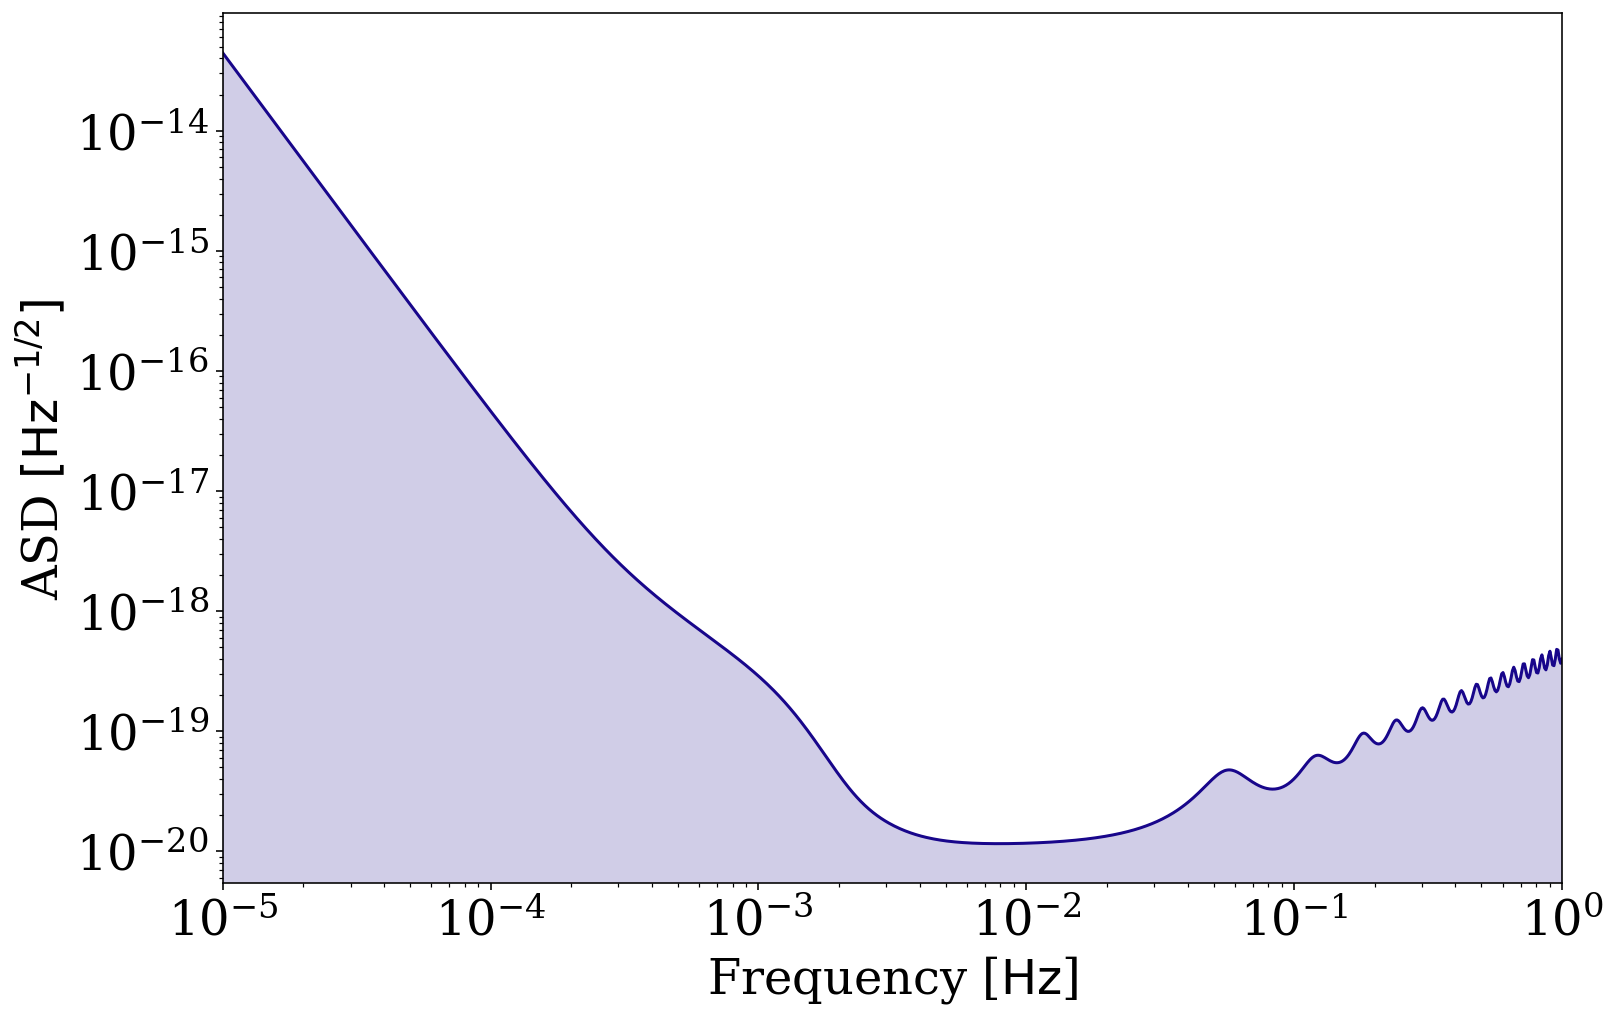

In [15]:
fig, ax = vis.plot_sensitivity_curve()

For the default sensitivity curve we plot the ASD, $\sqrt{S_{\rm n}(f)}$, but it is also possible to plot the characteristic strain, $\sqrt{f S_{\rm n}(f)}$, instead. Let's also adjust the frequency range to ignore low frequencies to show how that is done.

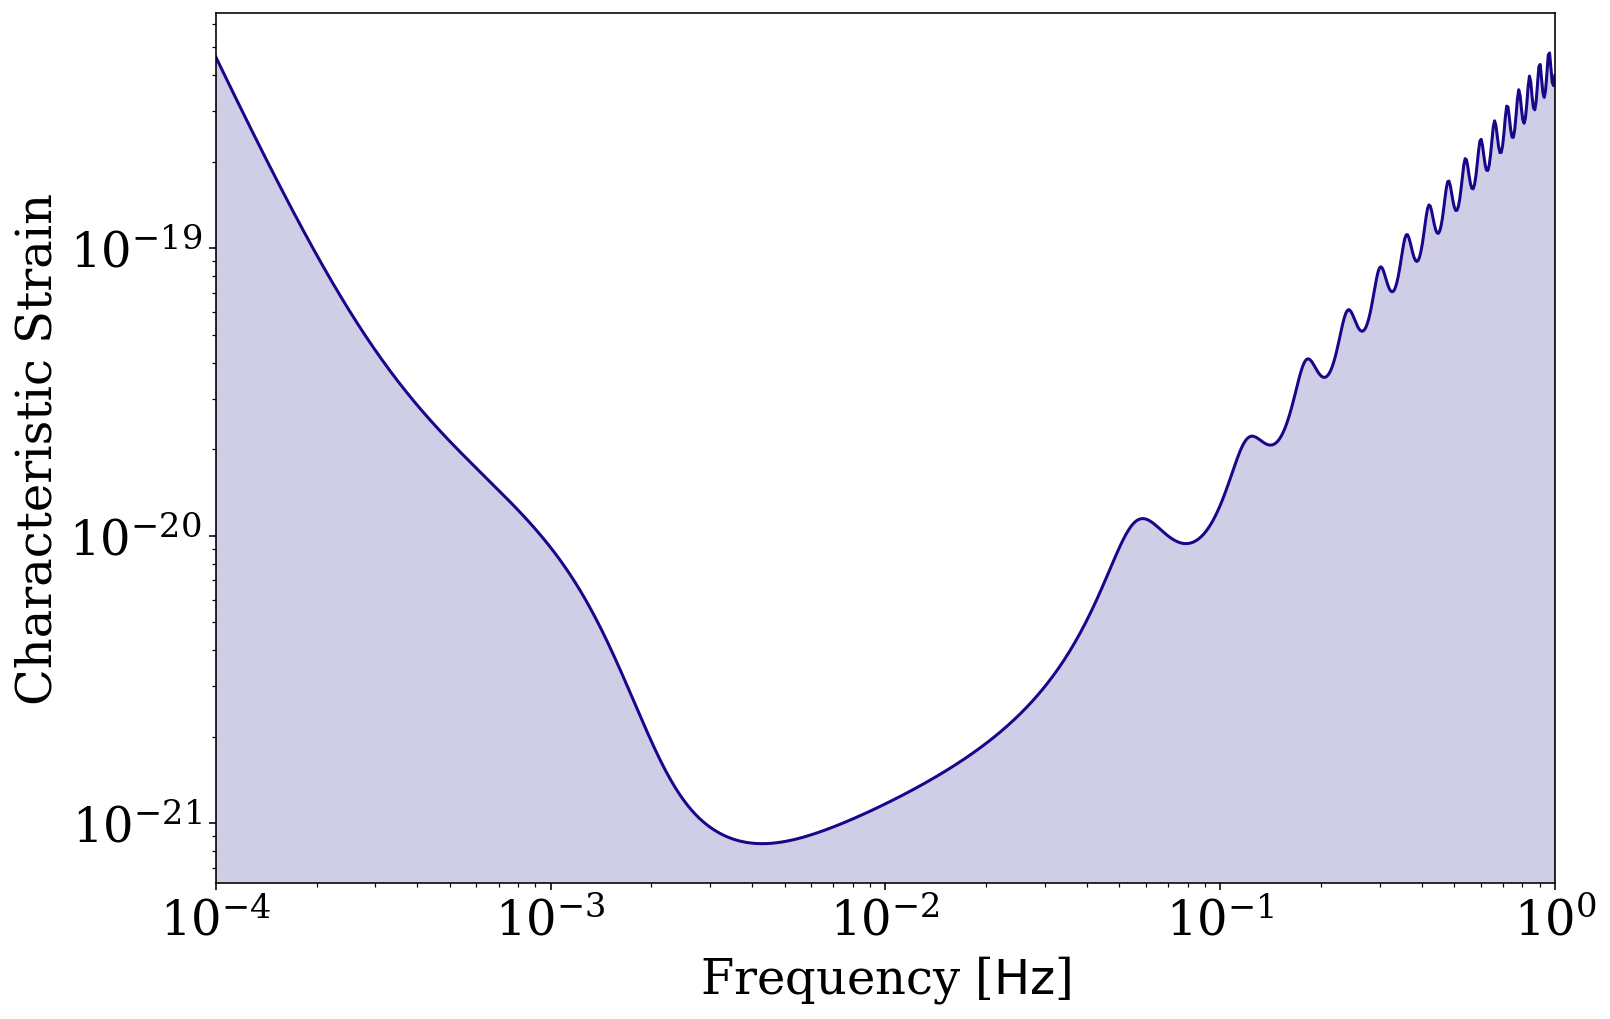

In [16]:
fig, ax = vis.plot_sensitivity_curve(frequency_range=np.logspace(-4, 0, 1000) * u.Hz, y_quantity="h_c")

It is also possible to adjust the sensitivity curve by changing the mission length, transfer function approximation and confusion noise. For this plot we set the `color` to `None` so that it picks default matplotlib colours and remove the fill for clarity.

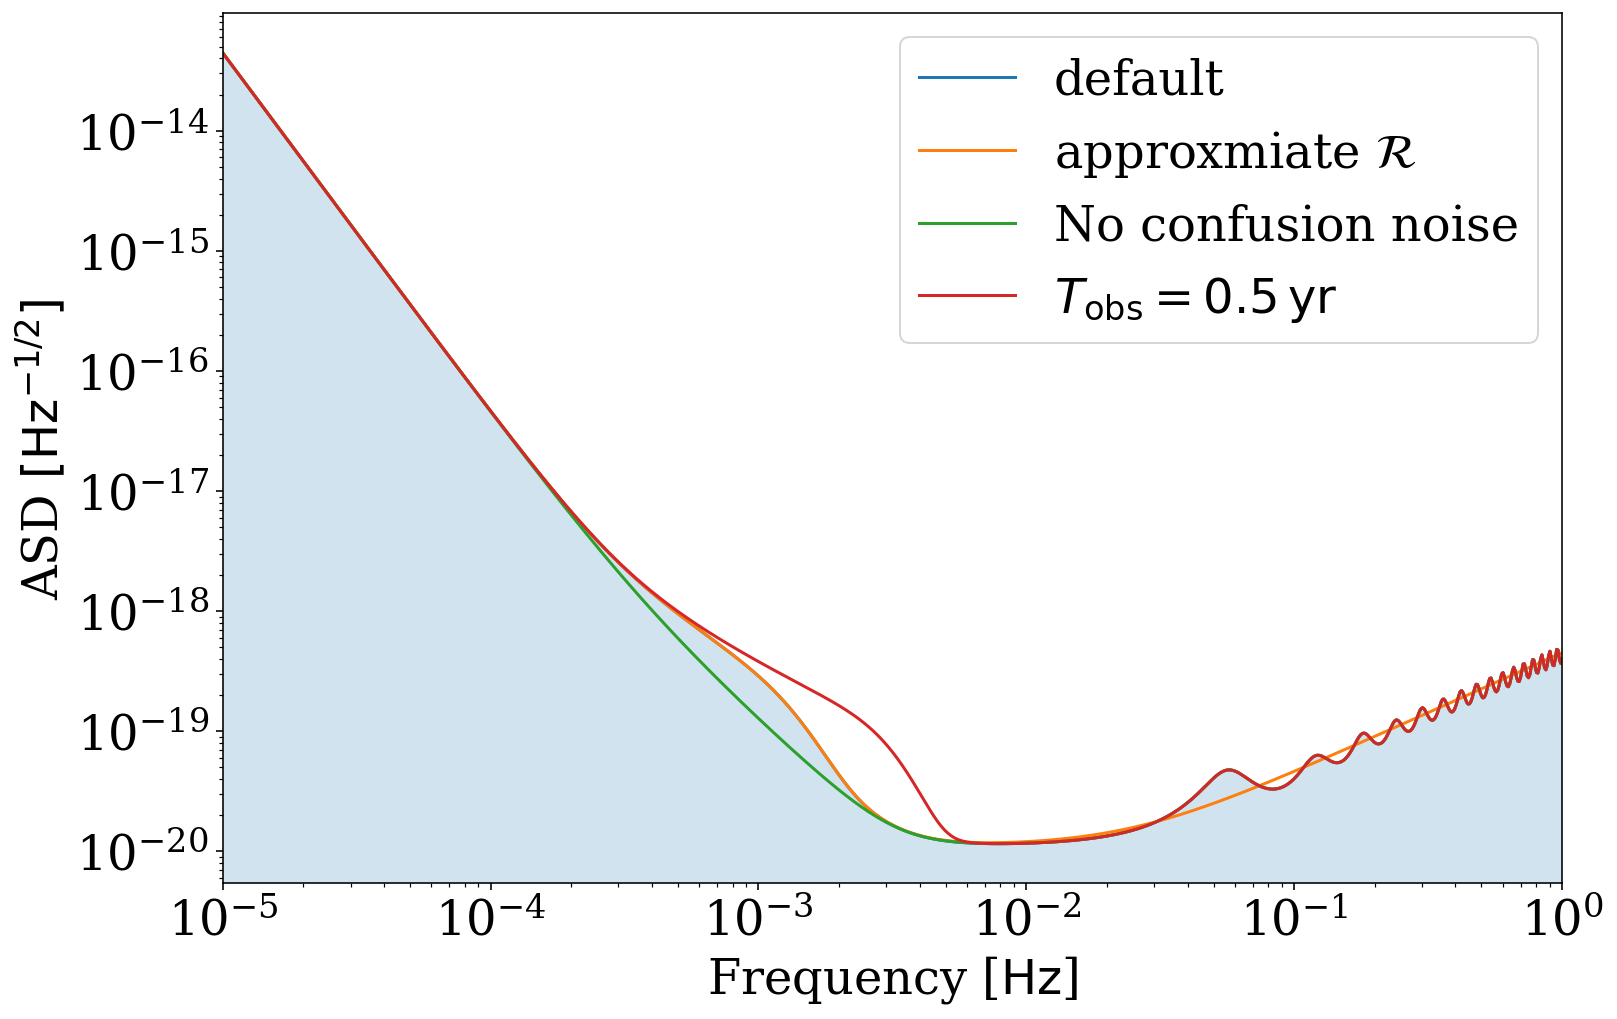

In [17]:
# default settings (keep fill for this one)
fig, ax = vis.plot_sensitivity_curve(label="default", fill=True, show=False, color=None)

# approximate the LISA transfer function
fig, ax = vis.plot_sensitivity_curve(approximate_R=True, label=r"approxmiate $\mathcal{R}$",
                                     fill=False, fig=fig, ax=ax, show=False, color=None)

# remove all confusion noise
fig, ax = vis.plot_sensitivity_curve(include_confusion_noise=False, label=r"No confusion noise",
                                     fill=False, fig=fig, ax=ax, show=False, color=None)

# shorten the mission length (increases confusion noise)
fig, ax = vis.plot_sensitivity_curve(t_obs=0.5 * u.yr, label=r"$T_{\rm obs} = 0.5 \,\rm{yr}$",
                                     fill=False, fig=fig, ax=ax, show=False, color=None)

ax.legend()

plt.show()

# Plot sources on the sensitivity curve

Finally, we combine everything we've done so far in this notebook in order to plot distributions of binaries on the sensitivity curve. We currently only support this for stationary sources (that are plotted as points rather than lines) but will eventually implement this for evolving sources too.

## Circular and Stationary Binaries
Let's start by creating a collection of circular and stationary binaries and computing the SNR for each.

In [18]:
n_values = 500
m_1 = np.random.uniform(0, 10, n_values) * u.Msun
m_2 = np.random.uniform(0, 10, n_values) * u.Msun
dist = np.random.uniform(0, 30, n_values) * u.kpc
f_orb = 10**(np.random.uniform(-5, -3, n_values)) * u.Hz
ecc = np.repeat(0.0, n_values)
t_obs = 4 * u.yr

sources = source.Source(m_1, m_2, ecc, dist, f_orb=f_orb)

In [19]:
circ_stat_snr = sources.get_snr(verbose=True)

Calculating SNR for 500 sources
	500 sources are stationary
		500 sources are stationary and circular


Now we can plot these binaries on the sensitivity curve using the `plot_sources_on_sc_circ_stat` function. Here we only plot those with SNR > 7 and as earlier we plot a density distribution for the most common 90% of the distribution and plot the remaining 10% outliers as scatter points. Try changing the value of `thresh` or switching whether to `fill` the KDE.

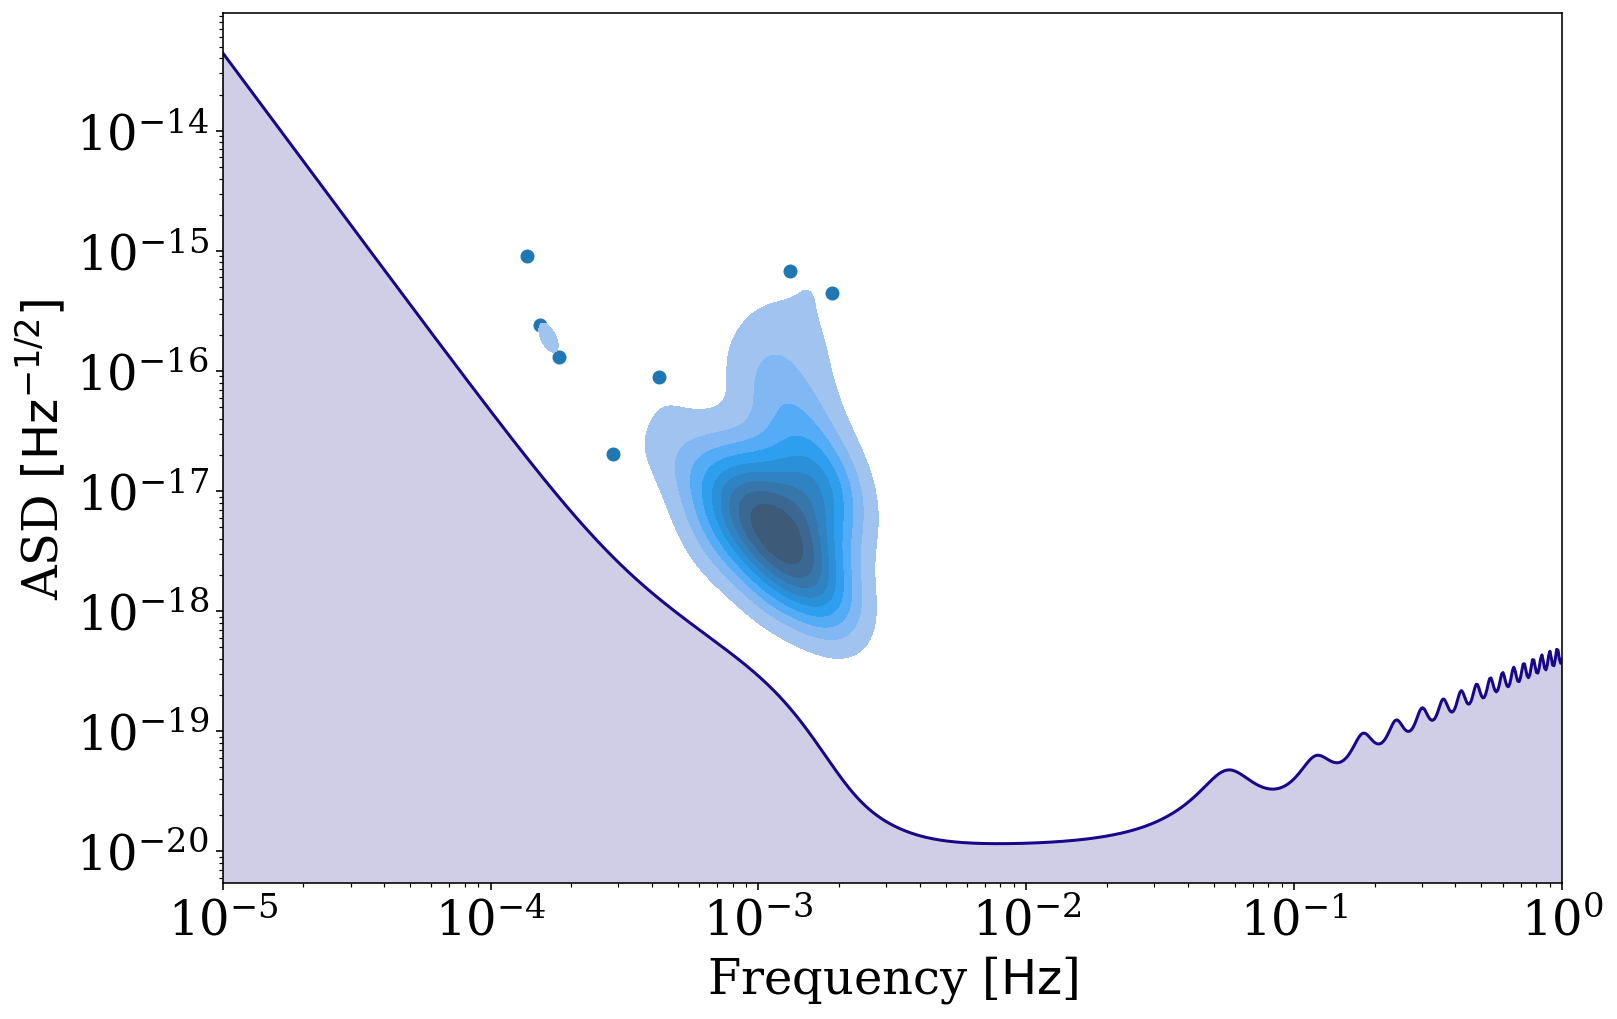

In [20]:
fig, ax = vis.plot_sources_on_sc_circ_stat(sources.f_orb, sources.get_h_0_n(2).flatten(), sources.snr, snr_cutoff=7, show=False)
fig, ax = vis.plot_sources_on_sc_circ_stat(sources.f_orb, sources.get_h_0_n(2).flatten(), sources.snr, snr_cutoff=7,
                                           fig=fig, ax=ax, disttype="kde", fill=True, thresh=0.1)

But we may not want to only know about the detectable population, why don't we also plot the undetectable binaries. Additionally here we use a colormap to show the SNR of each binary and this map diverges at SNR = 1. Try changing the value of `cutoff` to see how the plot changes.

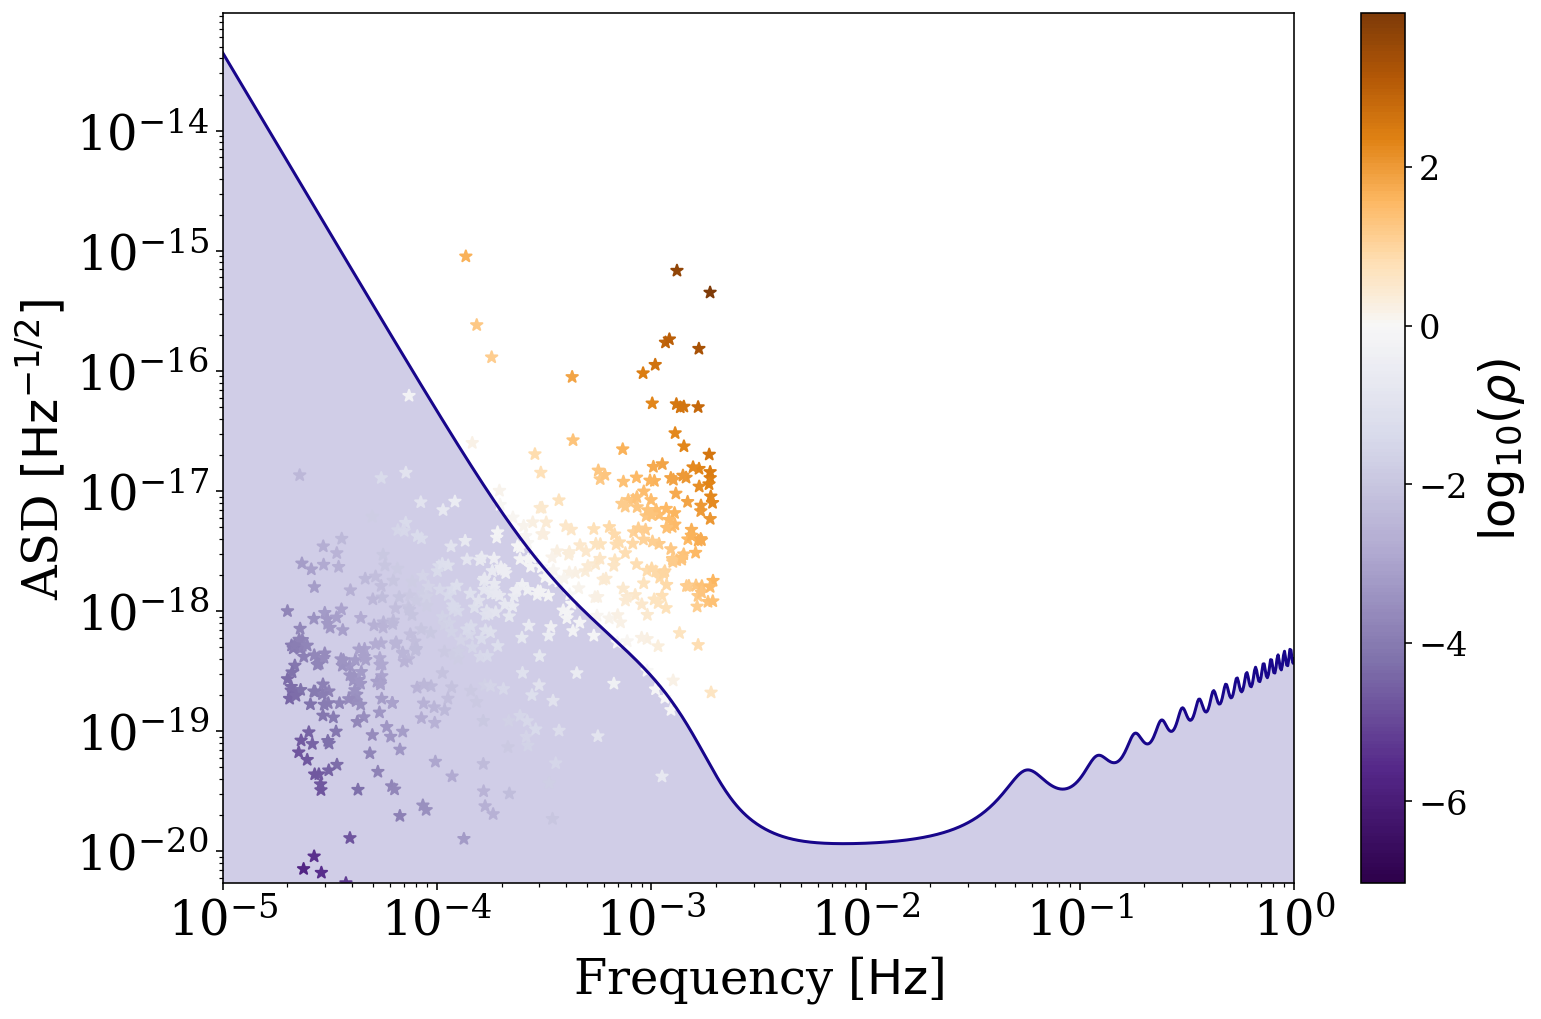

In [21]:
# define the detectable parameters
cutoff = 0
detectable_snr = sources.snr[sources.snr > cutoff]

# plot the detectable binaries
fig, ax = vis.plot_sources_on_sc_circ_stat(sources.f_orb, sources.get_h_0_n(2).flatten(), sources.snr,
                                           snr_cutoff=cutoff, marker="*", c=np.log10(detectable_snr), cmap="PuOr_r", show=False,
                                           norm=TwoSlopeNorm(vmin=np.log10(np.min(detectable_snr)), vcenter=0, vmax=np.log10(np.max(detectable_snr))))
# create a colorbar from the scatter points
cbar = fig.colorbar(ax.collections[1])
cbar.ax.set_ylabel(r"$\log_{10} (\rho)$")

plt.show()

It could also be interesting to see how other parameters are affecting your distribution. Here is the same plot but with only the detectable binaries and coloured by their distance, as well as with a smaller x range. You should hopefully see that the more distant binaries are at higher frequencies and comparatively lower ASDs.

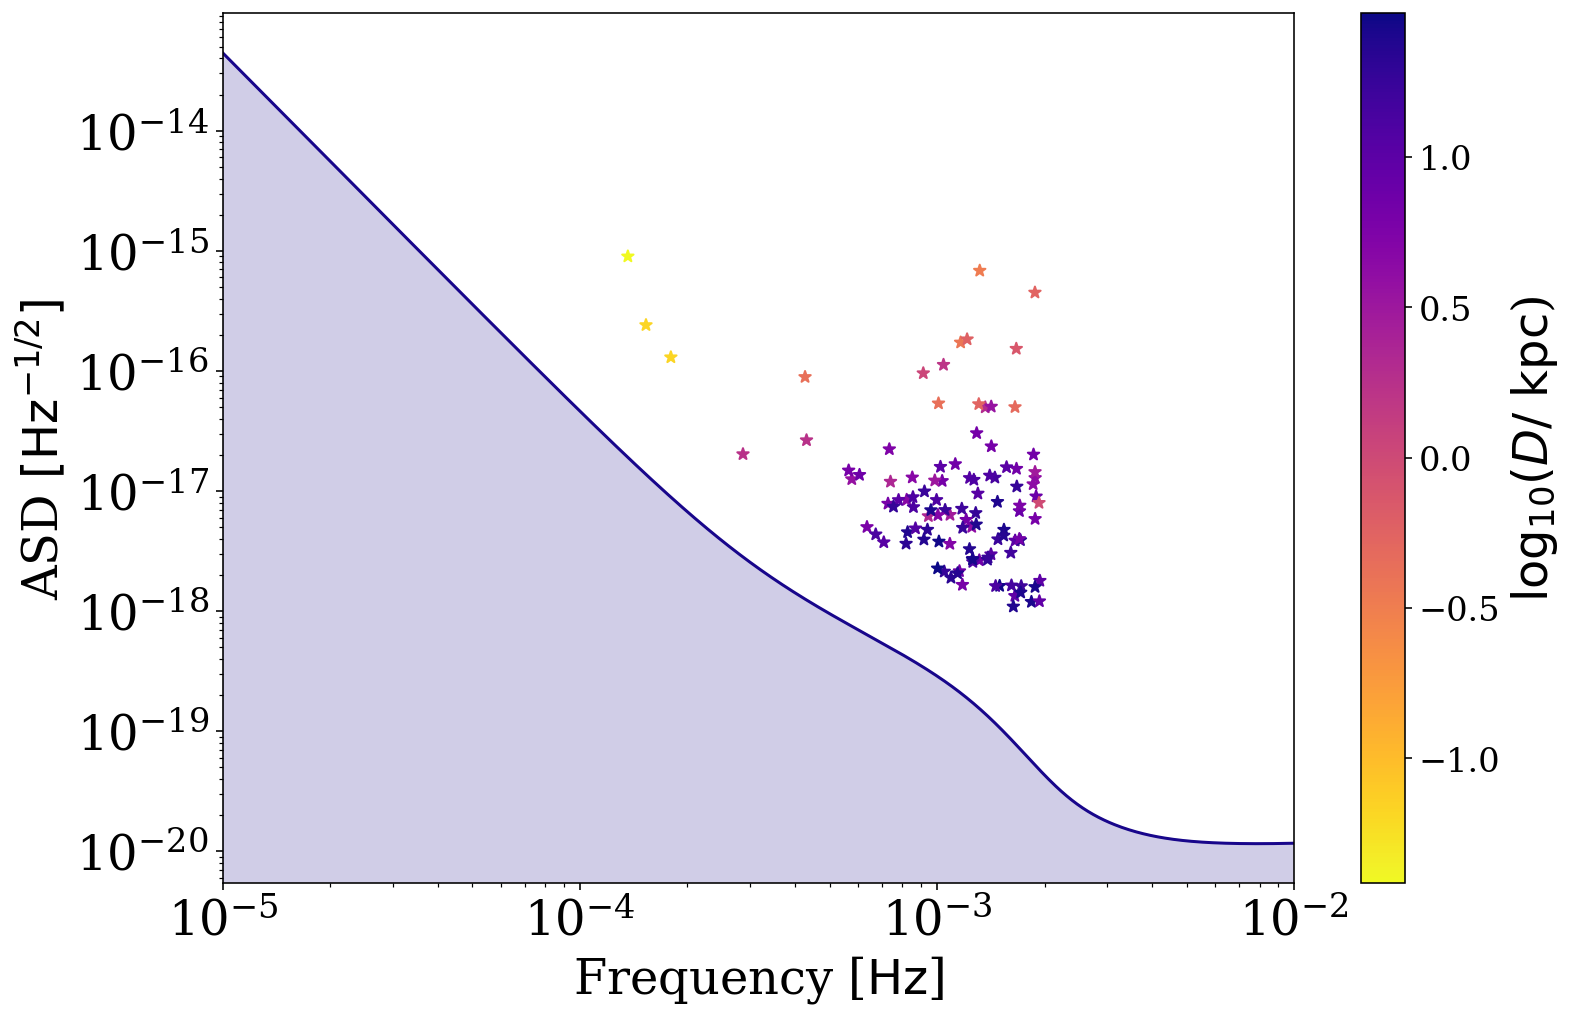

In [22]:
# define the detectable parameters
cutoff = 7
detectable_dist = sources.dist[sources.snr > cutoff].value

# plot the detectable binaries
fig, ax = vis.plot_sources_on_sc_circ_stat(sources.f_orb, sources.get_h_0_n(2).flatten(), sources.snr, xlim=(1e-5, 1e-2),
                                           snr_cutoff=cutoff, marker="*", c=np.log10(detectable_dist), cmap="plasma_r", show=False)
# create a colorbar from the scatter points
cbar = fig.colorbar(ax.collections[1])
cbar.ax.set_ylabel(r"{}{:latex})".format("$\log_{{{10}}} (D /$ ", sources.dist.unit))

plt.show()

## Eccentric and Stationary Binaries

These binaries work in much the same way except now the gravitational wave signal is spread over many harmonics. Therefore the dominant harmonic may no longer be the $n=2$ harmonic as with circular binaries. This is best shown in an example.

Let's take a collection of eccentric and stationary sources and show how eccentricity affects the dominant harmonic.

In [23]:
n_values = 500
m_1 = np.random.uniform(0, 10, n_values) * u.Msun
m_2 = np.random.uniform(0, 10, n_values) * u.Msun
dist = np.random.uniform(0, 30, n_values) * u.kpc
f_orb = 10**(np.random.uniform(-5, -3, n_values)) * u.Hz
ecc = np.random.uniform(0.0, 0.3, n_values)
t_obs = 4 * u.yr

sources = source.Source(m_1, m_2, ecc, dist, f_orb=f_orb)

In [24]:
ecc_stat_snr = sources.get_snr(verbose=True)

Calculating SNR for 500 sources
	500 sources are stationary
		90 sources are stationary and circular
		410 sources are stationary and eccentric


This source Class contains a function that returns the dominant harmonic for any given eccentricity. This is useful because we should plot the binary at this harmonic instead of the $n=2$. Let's plot it!

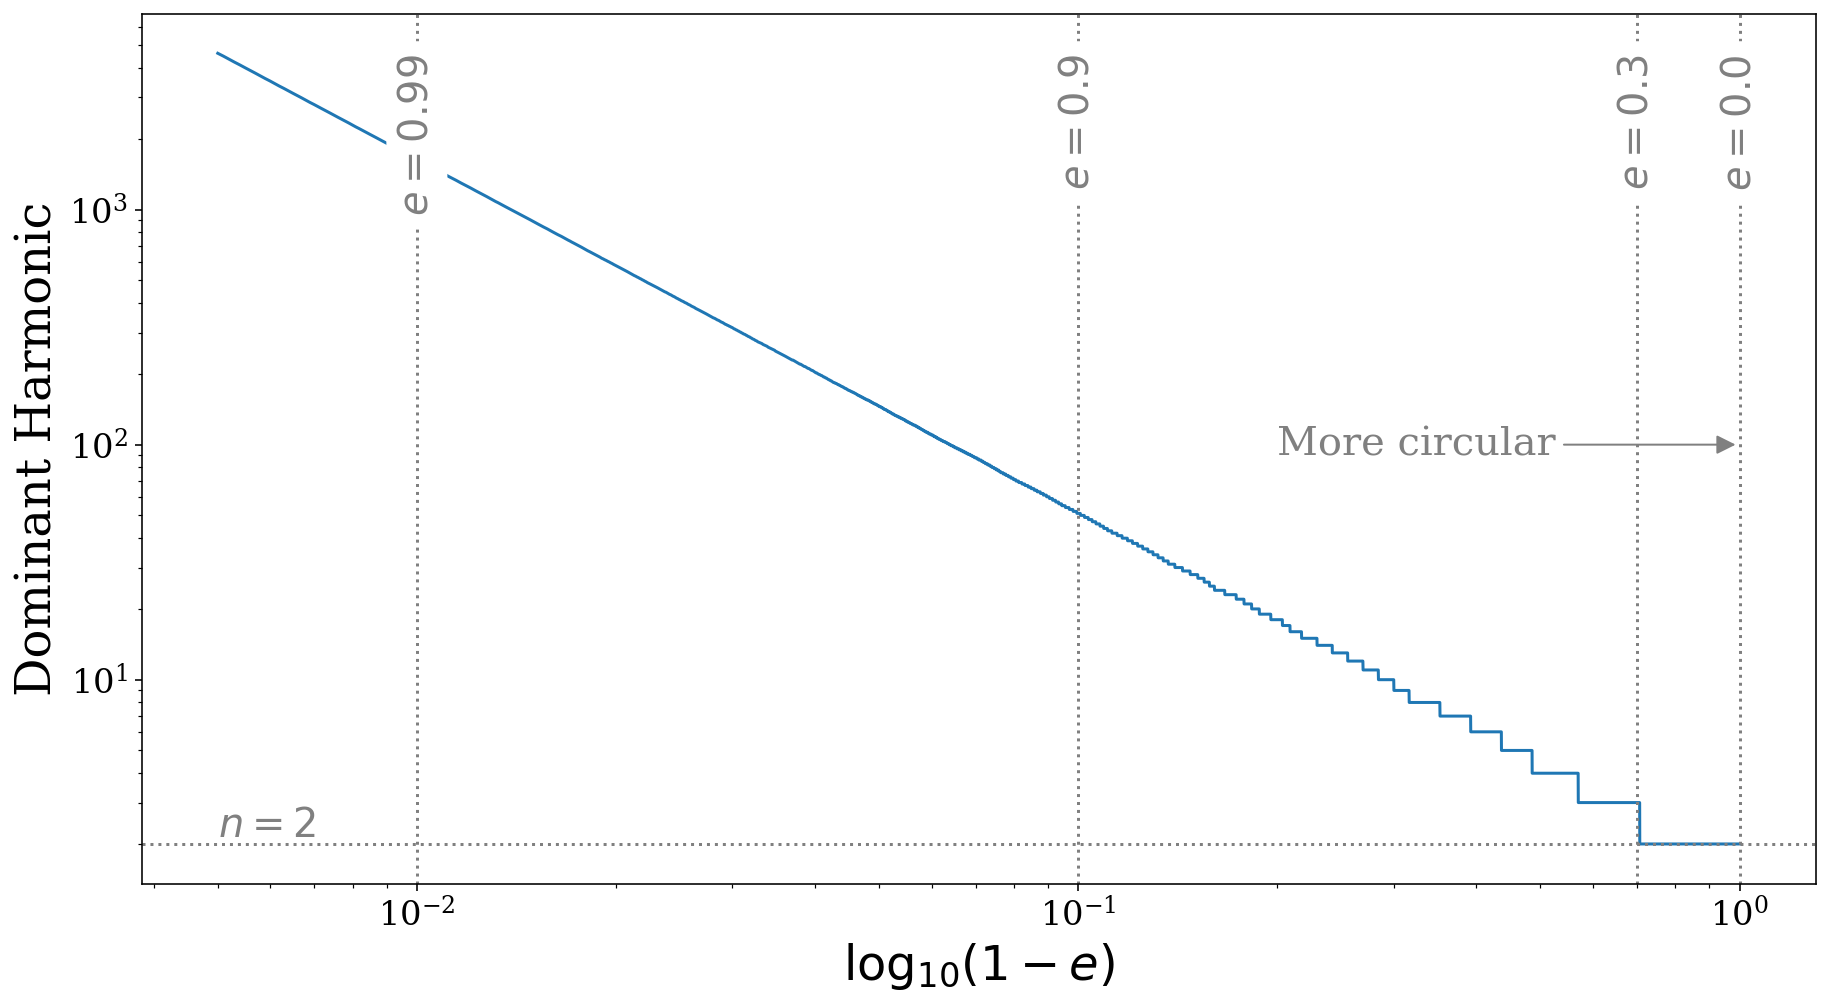

In [25]:
e_range = np.linspace(0, 0.995, 10000)
dh = sources.dominant_harmonic(e_range)

fig = plt.figure(figsize=(15, 8))

plt.loglog(1 - e_range, dh)

plt.axhline(2, linestyle="dotted", color="grey")
plt.annotate(r"$n = 2$", xy=(5e-3, 2), va="bottom", fontsize=20, color="grey")

for e, l in [(0, r"$e=0.0$"), (0.3, r"$e=0.3$"), (0.9, r"$e=0.9$"), (0.99, r"$e=0.99$")]:
    plt.axvline(1 - e, linestyle="dotted", color="grey")
    plt.annotate(l, xy=(1 - e, np.max(dh)), rotation=90, ha="center", va="top",
                 fontsize=20, color="grey", bbox=dict(boxstyle="round", fc="white", ec="none"))

plt.annotate("More circular", xy=(1, 1e2), xytext=(2e-1, 1e2), fontsize=20, va="center", color="grey",
             arrowprops=dict(arrowstyle="-|>", fc="grey", ec="grey"))

plt.xlabel(r"$\log_{10}(1 - e)$")
plt.ylabel("Dominant Harmonic")

plt.show()

As you can see in the plot above, once the eccentricity is greater than approximately $e = 0.3$, the dominant harmonic increases from $n = 2$ to $n = 3$ and this continues as eccentricity increases.

So now, using this function, we can plot eccentric binaries on the sensitivity curve.

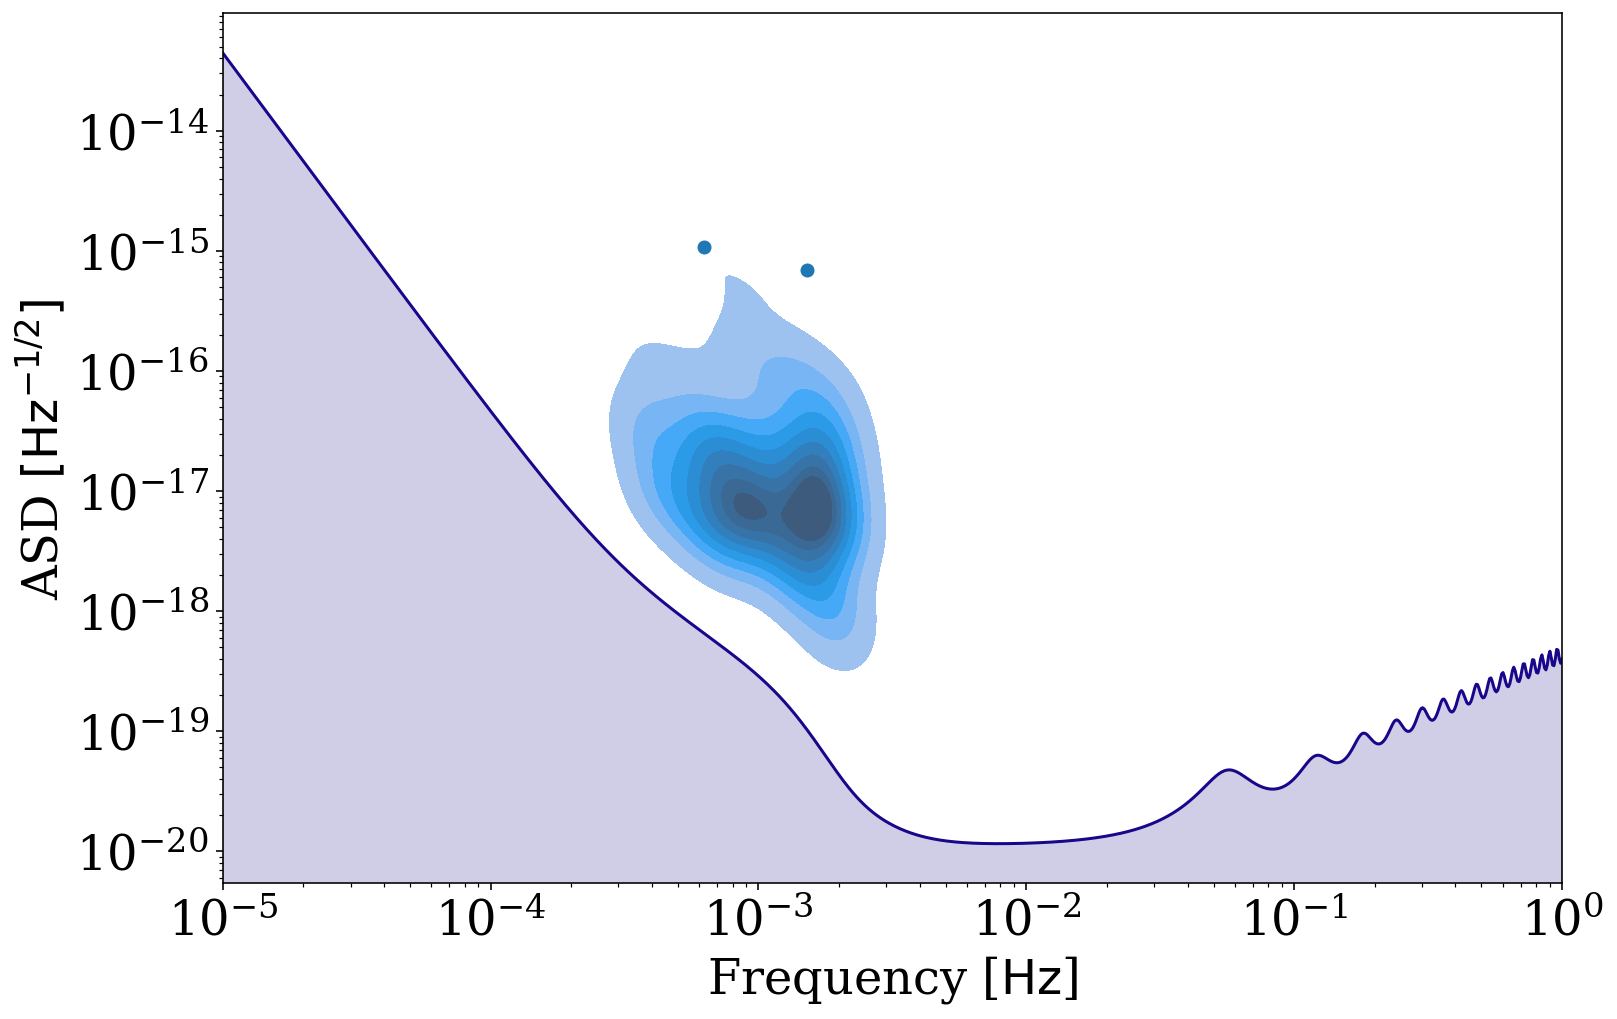

In [26]:
f_dom = f_orb * sources.dominant_harmonic(sources.ecc)

fig, ax = vis.plot_sources_on_sc_ecc_stat(f_dom, sources.snr, snr_cutoff=7, show=False)
fig, ax = vis.plot_sources_on_sc_ecc_stat(f_dom, sources.snr, snr_cutoff=7, fig=fig, ax=ax, disttype="kde", fill=True, thresh=0.05)